In [1]:
from keras.datasets import reuters

Using TensorFlow backend.
/home/ab/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(train_data,train_label), (test_data,test_label) = reuters.load_data()

In [3]:
max(max(train_data))

30945

In [4]:
max(max(test_data))

30747

In [5]:
import numpy as np

In [6]:
def vectorize(data,dimensions=31000):
    result = np.zeros((len(data),dimensions))
    for i, seq in enumerate(data):
        result[i,seq] = 1
    return result

In [7]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
from keras import losses

In [9]:
from keras.utils.np_utils import to_categorical

In [10]:
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

In [60]:
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=((31000,))))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(46,activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy'])
    return model

In [13]:
model = create_model()

In [17]:
x_val = x_train[:1000]
x_train_partial = x_train[1000:]
y_val = y_train[:1000]
y_train_partial = y_train[1000:]

In [18]:
history = model.fit(x=x_train_partial,y=y_train_partial,validation_data=(x_val,y_val),batch_size=512,epochs=20)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 651us/step - loss: 2.6450 - acc: 0.4559 - val_loss: 1.7054 - val_acc: 0.5980
Epoch 2/20
7982/7982 [==============================] - 4s 523us/step - loss: 1.4822 - acc: 0.6793 - val_loss: 1.3808 - val_acc: 0.6880
Epoch 3/20
7982/7982 [==============================] - 4s 525us/step - loss: 1.1679 - acc: 0.7335 - val_loss: 1.2612 - val_acc: 0.7180
Epoch 4/20
7982/7982 [==============================] - 4s 539us/step - loss: 0.9670 - acc: 0.7731 - val_loss: 1.1800 - val_acc: 0.7360
Epoch 5/20
7982/7982 [==============================] - 4s 514us/step - loss: 0.7837 - acc: 0.8196 - val_loss: 1.1970 - val_acc: 0.7330
Epoch 6/20
7982/7982 [==============================] - 4s 522us/step - loss: 0.6498 - acc: 0.8470 - val_loss: 1.1937 - val_acc: 0.7390
Epoch 7/20
7982/7982 [==============================] - 4s 532us/step - loss: 0.5277 - acc: 0.8708 - val_loss: 1.2069 - val_acc: 0.7550


In [23]:
import matplotlib.pyplot as plt

In [26]:
def plot_loss(history):
    val_loss = history.history['val_loss']
    train_loss = history.history['loss'] 
    epochs = range(1,len(val_loss) + 1)
    plt.plot(epochs,val_loss,'r',label='validation_loss')
    plt.plot(epochs,train_loss,'g',label='train_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

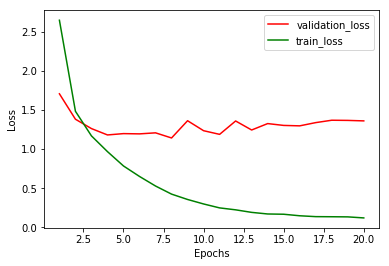

In [28]:
plot_loss(history)

In [32]:
def plot_accuracy(history):
    val_acc = history.history['val_acc']
    train_acc = history.history['acc'] 
    epochs = range(1,len(val_acc) + 1)
    plt.plot(epochs,val_acc,'r',label='validation_acc')
    plt.plot(epochs,train_acc,'g',label='train_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

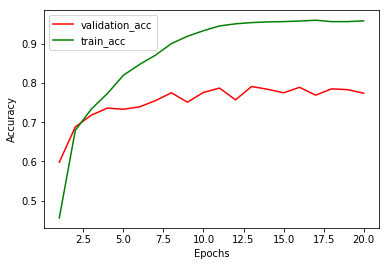

In [33]:
plot_accuracy(history)

In [61]:
model = create_model()

In [62]:
model.fit(x=x_train,y=y_train,batch_size=512,epochs=7)

Epoch 1/7
8982/8982 [==============================] - 4s 482us/step - loss: 2.6237 - acc: 0.4304
Epoch 2/7
8982/8982 [==============================] - 4s 425us/step - loss: 1.4252 - acc: 0.6870
Epoch 3/7
8982/8982 [==============================] - 4s 433us/step - loss: 1.0811 - acc: 0.7524
Epoch 4/7
8982/8982 [==============================] - 6s 684us/step - loss: 0.8229 - acc: 0.8194
Epoch 5/7
8982/8982 [==============================] - 6s 673us/step - loss: 0.6385 - acc: 0.8587
Epoch 6/7
8982/8982 [==============================] - 6s 648us/step - loss: 0.4935 - acc: 0.8925
Epoch 7/7
8982/8982 [==============================] - 6s 619us/step - loss: 0.3969 - acc: 0.9123


In [63]:
result = model.evaluate(x_test,y_test)

2246/2246 [==============================] - 1s 483us/step


In [64]:
result

[1.1694107514242986, 0.75957257351701213]

In [41]:
def create_model_new():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=((31000,))))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(46,activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy'])
    return model

In [47]:
model = create_model_new()

In [48]:
model.fit(x=x_train,y=y_train,batch_size=512,epochs=5)

Epoch 1/5
8982/8982 [==============================] - 4s 451us/step - loss: 2.4585 - acc: 0.5577
Epoch 2/5
8982/8982 [==============================] - 4s 438us/step - loss: 1.2956 - acc: 0.7219
Epoch 3/5
8982/8982 [==============================] - 4s 424us/step - loss: 0.9394 - acc: 0.8047
Epoch 4/5
8982/8982 [==============================] - 4s 424us/step - loss: 0.7081 - acc: 0.8592
Epoch 5/5
8982/8982 [==============================] - 4s 432us/step - loss: 0.5414 - acc: 0.8969


In [49]:
result = model.evaluate(x_test,y_test)

2246/2246 [==============================] - 1s 439us/step


In [50]:
result

[0.97459072039154948, 0.78673196799608602]